# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import torch
# from sklearn.metrics import roc_auc_score
import numpy as np

from tqdm import tqdm
import sys
sys.path.append("../../..")
from src.models import training_utils,base_model,sage_ones

data_folder = "../../../data/processed/graph_data_nohubs/merged_types/"
experiments_folder = "../../../data/experiments/design_space_merged_experiment/seed_0/"
reports_folder = "../../../reports/explore_predictions/"

# Load a pretrained model

In [2]:
results = pd.read_parquet(experiments_folder+"experiment_16_06_23__17_59_43.parquet")

node_csv = pd.read_csv(data_folder+"merged_nodes.csv")
node_info = pd.read_csv(data_folder+"merged_node_info.csv")
edge_data = pd.read_csv(data_folder+"merged_edges.csv")

datasets, node_map = training_utils.load_data(data_folder+"split_dataset/seed_0/")
train_data, val_data = datasets

new_datasets, new_node_map = training_utils.load_data(data_folder+"split_dataset/seed_4/")
new_train_data, new_val_data = new_datasets

In [3]:
df = pd.read_csv(data_folder+"split_dataset/seed_4/tensor_df.csv",index_col=0).set_index("node_index",drop=True)

In [4]:
df

node_id                                          node_name  \
node_index                                                                     
0                       1                                               A1BG   
653                 10422                                              UBAC1   
13168               63891                                             RNF123   
6638               284403                                              WDR62   
6611               284161                                              GDPD1   
...                   ...                                                ...   
35265       R-HSA-5579013            Defective CYP7B1 causes SPG5A and CBAS3   
35260       R-HSA-5579007               Defective ACY1 causes encephalopathy   
35152       R-HSA-4687000          Defective MPDU1 causes MPDU1-CDG (CDG-1f)   
34551       R-HSA-1855231                   Synthesis of IPs in the ER lumen   
35310       R-HSA-5619039  Defective SLC12A6 causes agenesis of the corpu...   

               node_type       node_source  tensor_index  comunidades_infomap  \
node_index                                                                      
0           gene_protein          disgenet             0                  NaN   
653         gene_protein            hippie             1                  NaN   
13168       gene_protein          disgenet             2                  NaN   
6638        gene_protein          disgenet             3                  NaN   
6611        gene_protein            hippie             4                  NaN   
...                  ...               ...           ...                  ...   
35265            pathway  primekg_REACTOME          2012                  NaN   
35260            pathway  primekg_REACTOME          2013                  NaN   
35152            pathway  primekg_REACTOME          2014                  NaN   
34551            pathway  primekg_REACTOME          2015                  NaN   
35310            pathway  primekg_REACTOME          2016                  NaN   

            comunidades_louvain  degree_gda  degree_pp  degree_dd  \
node_index                                                          
0                           NaN         2.0       12.0        0.0   
653                         NaN         0.0       36.0        0.0   
13168                       NaN         2.0       24.0        0.0   
6638                        NaN        14.0       18.0        0.0   
6611                        NaN         0.0       29.0        0.0   
...                         ...         ...        ...        ...   
35265                       NaN         0.0        1.0        0.0   
35260                       NaN         0.0        1.0        0.0   
35152                       NaN         0.0        1.0        0.0   
34551                       NaN         0.0        1.0        0.0   
35310                       NaN         0.0        1.0        0.0   

            total_degree  
node_index                
0                   14.0  
653                 36.0  
13168               26.0  
6638                32.0  
6611                29.0  
...                  ...  
35265                1.0  
35260                1.0  
35152                1.0  
34551                1.0  
35310                1.0  

[35839 rows x 11 columns]

In [5]:
results.sort_values(by="auc",ascending=False)

L2_norm  batch_norm conv_type  delta  dropout  epochs  \
62     True        True  SAGEConv    0.1      0.1     400   
55     True        True  SAGEConv    0.1      0.1     400   
54     True        True  SAGEConv    0.1      0.1     400   
59     True        True  SAGEConv    0.1      0.1     400   
9      True        True  SAGEConv    0.1      0.1     400   
..      ...         ...       ...    ...      ...     ...   
32     True        True  SAGEConv    0.1      0.1     400   
17     True        True  SAGEConv    0.1      0.1     400   
14     True        True  SAGEConv    0.1      0.1     400   
35     True        True  SAGEConv    0.1      0.1     400   
16     True        True  SAGEConv    0.1      0.1     400   

        experiment_name  feature_dim feature_type  heads  ...  \
62  layers_connectivity           10         ones      2  ...   
55  layers_connectivity           10         ones      2  ...   
54  layers_connectivity           10         ones      2  ...   
59  layers_connectivity           10         ones      2  ...   
9        sage_aggr_type           10         ones      2  ...   
..                  ...          ...          ...    ...  ...   
32        GAT_aggr_type           10         ones      2  ...   
17       sage_aggr_type           10         ones      2  ...   
14       sage_aggr_type           10         ones      2  ...   
35        GAT_aggr_type           10         ones      2  ...   
16       sage_aggr_type           10         ones      2  ...   

    micro_aggregation  msg_passing_layers normalize_output  patience  \
62                sum                   2            False        10   
55                sum                   3            False        10   
54                sum                   2            False        10   
59                sum                   3            False        10   
9                 sum                   2            False        10   
..                ...                 ...              ...       ...   
32                max                   2            False        10   
17                max                   2            False        10   
14                max                   2            False        10   
35                max                   2            False        10   
16               mean                   2            False        10   

   post_process_layers pre_process_layers               supervision_types  \
62                   1                  0  [[gene_protein, gda, disease]]   
55                   1                  0  [[gene_protein, gda, disease]]   
54                   1                  0  [[gene_protein, gda, disease]]   
59                   1                  0  [[gene_protein, gda, disease]]   
9                    1                  0  [[gene_protein, gda, disease]]   
..                 ...                ...                             ...   
32                   1                  0  [[gene_protein, gda, disease]]   
17                   1                  0  [[gene_protein, gda, disease]]   
14                   1                  0  [[gene_protein, gda, disease]]   
35                   1                  0  [[gene_protein, gda, disease]]   
16                   1                  0  [[gene_protein, gda, disease]]   

    weight_decay       auc                                         curve_data  
62         0.001  0.909951  [[0.703677773475647, 0.6893664002418518, 0.676...  
55         0.001  0.909892  [[0.6917510628700256, 0.6621622443199158, 0.63...  
54         0.001  0.909118  [[0.6860914826393127, 0.6716712117195129, 0.65...  
59         0.001  0.909058  [[0.6657952666282654, 0.6534611582756042, 0.64...  
9          0.001  0.908880  [[0.6850339770317078, 0.6739553809165955, 0.66...  
..           ...       ...                                                ...  
32         0.001  0.821747  [[0.691173255443573, 0.6777836084365845, 0.665...  
17         0.001  0.816867  [[0.7043997645378113, 0.68853408

In [6]:
def load_model(weights_path,supervision_types,metadata,model_args=None):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    weights = torch.load(weights_path,map_location=torch.device(device))
    model = base_model.base_model(model_args,metadata,supervision_types)
    model.load_state_dict(weights)

    return model

In [7]:
model_params = ['hidden_channels', 'conv_type', 'batch_norm', 'dropout', 'micro_aggregation', 'macro_aggregation', 'layer_connectivity', 'L2_norm', 'pre_process_layers', 'msg_passing_layers', 'post_process_layers', 'normalize_output', 'jumping_knowledge']
eid = 62
params = results[model_params].loc[eid].to_dict()
weights_path = experiments_folder+"model_62_16_06_23__17_59_43.pth"

old_model = load_model(weights_path,[("gene_protein","gda","disease")],train_data.metadata(),params)

In [8]:
weights_path = "../../../data/experiments/merged_types_experiment/sage_ones_first_negatives_exp_04_07_23__12_07.pth"
weights = torch.load(weights_path)
new_model = sage_ones.Model(train_data.metadata(),[("gene_protein","gda","disease")])
new_model.load_state_dict(weights)

feature_type = "ones"
feature_dim = 10

train_data = training_utils.initialize_features(train_data, feature_type, feature_dim)
val_data = training_utils.initialize_features(val_data, feature_type, feature_dim)

new_train_data = training_utils.initialize_features(new_train_data, feature_type, feature_dim)
new_val_data = training_utils.initialize_features(new_val_data, feature_type, feature_dim)

# Get encodings

In [9]:
# feature_type = results.loc[eid,"feature_type"]
# feature_dim  = results.loc[eid,"feature_dim"]
# val_data = training_utils.initialize_features(val_data, feature_type, feature_dim)

In [10]:
old_encodings = training_utils.get_encodings(old_model,val_data)
new_encodings = training_utils.get_encodings(new_model,new_val_data)

# Prioritize

In [11]:
class inner_product_decoder(torch.nn.Module):
    def forward(self,x_source,x_target,apply_sigmoid=True):
        pred = (x_source * x_target).sum(dim=1)

        if apply_sigmoid:
            pred = torch.sigmoid(pred)

        return pred

In [12]:
def prioritize(node_index,encodings_dict,node_df):
    assert df.index.name == "node_index", f"df index must be node_index, not {df.index.name}."

    decoder = inner_product_decoder()
    source_type = node_df.loc[node_index,"node_type"]
    tensor_index = node_df.loc[node_index,"tensor_index"]

    if source_type == "disease":
        target_type = "gene_protein"

    elif source_type == "gene_protein":
        target_type = "disease"

    source_vector = encodings_dict[source_type][tensor_index]
    target_matrix = encodings_dict[target_type]

    predicted_edges = decoder(source_vector,target_matrix)
    ranked_scores, ranked_indices = torch.sort(predicted_edges,descending=True)
    results = pd.DataFrame({"score":ranked_scores.cpu().numpy(),"tensor_index":ranked_indices.cpu().numpy()})
    results.score = results.score.round(3)

    index_map = df.loc[df.node_type == target_type,["tensor_index","node_name","degree_gda"]].reset_index()
    ranked_predictions = pd.merge(results,index_map,on="tensor_index")
    ranked_predictions.index.name = "rank"

    return ranked_predictions

In [13]:
df.sort_values(by="degree_dd",ascending=False)[:20]

node_id  \
node_index                                                      
9958                                           5113_5550_5108   
3072        14866_12012_33850_11890_11687_12014_13758_1156...   
865         10632_33369_33371_10472_14477_32598_10396_3276...   
2788        14302_12928_14568_12867_12766_13132_13239_1148...   
2421        13274_10761_10945_8378_12796_910_11272_13611_1...   
5438                                              24623_18751   
2818        14376_13657_54837_30918_20847_13820_14486_1380...   
1315        11160_13119_13978_12060_12327_12670_13210_1106...   
20104                                                C0025521   
1182        11015_12527_14799_14673_12489_12260_12665_1110...   
24773                                                C0520572   
7                                     10001_19287_23046_23048   
2649        13967_13950_13931_13952_18264_54549_30899_1394...   
1926        12123_54559_8909_26765_14904_11291_26729_30043...   
4012                                        19722_19724_15163   
373                              10150_4958_5096_6082_500_514   
1607        11482_14396_11702_11003_14100_13479_11400_1280...   
19529                                                C0018799   
18471                                                C0001418   
2521        13594_13485_14867_12246_11781_11833_33482_3347...   

                                              node_name node_type node_source  \
node_index                                                                      
9958                                 infectious disease   disease     primekg   
3072                        Charcot-Marie-Tooth disease   disease     primekg   
865          developmental and epileptic encephalopathy   disease     primekg   
2788                      hereditary spastic paraplegia   disease     primekg   
2421                               retinitis pigmentosa   disease     primekg   
5438                       otorhinolaryngologic disease   disease     primekg   
2818        intellectual disability, autosomal dominant   disease     primekg   
1315          autosomal recessive nonsyndromic deafness   disease     primekg   
20104                       Inborn Errors of Metabolism   disease    disgenet   
1182                                           cataract   disease     primekg   
24773                                       Enzymopathy   disease    disgenet   
7                         ectodermal dysplasia syndrome   disease     primekg   
2649                     peroxisome biogenesis disorder   disease     primekg   
1926               congenital disorder of glycosylation   disease     primekg   
4012                                 glomerular disease   disease     primekg   
373                             squamous cell carcinoma   disease     primekg   
1607                             dilated cardiomyopathy   disease     primekg   
19529                                    Heart Diseases   disease    disgenet   
18471                                    Adenocarcinoma   disease    disgenet   
2521                             spinocerebellar ataxia   disease     primekg   

            tensor_index  comunidades_infomap  comunidades_louvain  \
node_index                                                           
9958                3940                359.0                 33.0   
3072                3605                382.0                 57.0   
865                 1730                184.0                 38.0   
2788                5867                379.0                 37.0   
2421                4127                332.0                 54.0   
5438                1899                220.0                 24.0   
2818                4268                 77.0                 41.0   
1315                2547                745.0                 58.0   
20104                314                271.0                 39.0   
1182                2328                353.0                 55.0   


In [14]:
def tensor_to_edgelist(tensor: torch.tensor):
    sources = tensor[0,:].tolist()
    targets = tensor[1,:].tolist()
    edgelist = list(zip(sources,targets))
    return edgelist

def reverse_map(node_map,edge_list,edge_type):
    """Maps edge dictionary from pyg Heterodata back into the original node indexes from the dataframe"""
    src_map = {v:k for k,v in node_map[edge_type[0]].items()}
    dst_map = {v:k for k,v in node_map[edge_type[2]].items()}
    mapped_edge_list = [(src_map[n1],dst_map[n2]) for (n1,n2) in edge_list]

    return mapped_edge_list

def inverse_map_heterodata(data,node_map):
    """Maps full edge data from pyg Heterodata back into the original node indexes from the dataframe"""
    edge_dict = {}
    for edge_type in data.edge_types:
        type_dict = {}
        edge_tensor = data[edge_type]["edge_index"]
        edge_list = tensor_to_edgelist(edge_tensor)
        mapped_edge_list = reverse_map(node_map,edge_list,edge_type)

        type_dict["message_passing_edges"] = mapped_edge_list

        if "edge_label_index" in data[edge_type].keys():
            labeled_edges_tensor = data[edge_type]["edge_label_index"]
            labeled_edges_list = tensor_to_edgelist(labeled_edges_tensor)
            mapped_labeled_edges_list = reverse_map(node_map,labeled_edges_list,edge_type)

            edge_labels = data[edge_type]["edge_label"].tolist()

            type_dict["supervision_edges"] = mapped_labeled_edges_list
            type_dict["supervision_labels"] = edge_labels
 
        edge_dict[edge_type] = type_dict
    
    return edge_dict

def edge_map_to_df(inverse_map_dict):
    edges_df = {}
    for edge_type,sub_dict in inverse_map_dict.items():
        if "supervision_edges" in sub_dict.keys():
            edges = pd.DataFrame(sub_dict["supervision_edges"]).rename(columns={0:edge_type[0],1:edge_type[2]})
            edge_labels_df = pd.concat([edges,pd.DataFrame(sub_dict["supervision_labels"])],axis=1).rename(columns={0:"label"})

            msg_passing_edges_df = pd.DataFrame(sub_dict["message_passing_edges"]).rename(columns={0:edge_type[0],1:edge_type[2]})

            edges_df[edge_type] = {"supervision_edges":edge_labels_df,"message_passing_edges":msg_passing_edges_df}
    
    return edges_df

def get_full_edge_df(train_data,val_data,node_map,edge_type = ("gene_protein","gda","disease")):
    train_dataframes = edge_map_to_df(inverse_map_heterodata(train_data,node_map))[edge_type]
    val_dataframes = edge_map_to_df(inverse_map_heterodata(val_data,node_map))[edge_type]

    train_df = pd.concat([df for df in train_dataframes.values()])
    train_df["edge_subtype"] = train_df.fillna(-1).label.apply(lambda x: "supervision" if x >= 0 else "message_passing")
    train_df["dataset"] = "train"


    val_df = pd.concat([df for df in val_dataframes.values()])
    val_df["edge_subtype"] = val_df.fillna(-1).label.apply(lambda x: "supervision" if x >= 0 else "message_passing")
    val_df["dataset"] = "validation"

    full_df = pd.concat([train_df,val_df])
    return full_df


def test_mapping(full_df, original_edge_data, edge_type = ("gene_protein","gda","disease")):
    original_edges = original_edge_data[(original_edge_data.x_type == edge_type[0]) & (original_edge_data.edge_type == edge_type[1])][["x_index","y_index"]]
    test_df = full_df[(full_df.label == 1) | (full_df.edge_subtype == "message_passing")][[edge_type[0],edge_type[2]]].drop_duplicates().rename(columns={edge_type[0]:"x_index",edge_type[2]:"y_index"})
    both, left, right = pd.merge(test_df, original_edges, how="inner", indicator=True)._merge.value_counts()
    print(both == len(test_df), left == 0, right == 0)

In [15]:
def hits_at_k(node_index,predictions,edge_df,df=df):
      k_list = [5,10,50,100]

      node_type = df.loc[node_index,"node_type"]
      y_type = "disease" if node_type == "gene_protein" else "gene_protein"

      new_edges = set(edge_df[(edge_df[node_type] == node_index) & (edge_df.label == 1) & (edge_df.dataset == "validation")][y_type].values)
      seen_edges = set(edge_df[(edge_df[node_type] == node_index) & (edge_df.label != 0)][y_type].values) - new_edges

      results = {"seen_edges":len(seen_edges),"new_edges":len(new_edges)}

      for k in k_list:
            predicted_top = set(predictions[:k]["node_index"].values)

            seen_hits = len(seen_edges.intersection(predicted_top))
            new_hits = len(new_edges.intersection(predicted_top))

            results[f"{k}_seen"] = seen_hits
            results[f"{k}_new"] = new_hits

      return results

In [16]:
encodings = old_encodings
dataset = val_data

node_index = 20104
print(df.loc[node_index,"node_name"], df.loc[node_index,"degree_gda"])
predictions = prioritize(node_index,encodings,df)

Inborn Errors of Metabolism 17.0


In [17]:
predictions

score  tensor_index  node_index                 node_name  degree_gda
rank                                                                        
0      0.977         10921       10517                      PLAT       136.0
1      0.976          1558        4623                     FGFR2        93.0
2      0.975          1045        8360                     L1CAM        52.0
3      0.975         17011       14416                      TTPA        67.0
4      0.975         10378       10697                      POMC       241.0
...      ...           ...         ...                       ...         ...
17738  0.031         14885       36307                 Laminin-5         0.0
17739  0.031         13785       36476          NMDA receptor_2D         0.0
17740  0.031         13787       36475          NMDA receptor_2C         0.0
17741  0.031         14986       36224  LMX1B/SFPQ/PSPC1 complex         0.0
17742  0.031          3412       36618               U2AF1/U2AF2         0.0

[17743 rows x 5 columns]

In [18]:
old_full_df = get_full_edge_df(train_data,val_data,node_map)
new_full_df = get_full_edge_df(new_train_data,new_val_data,node_map)

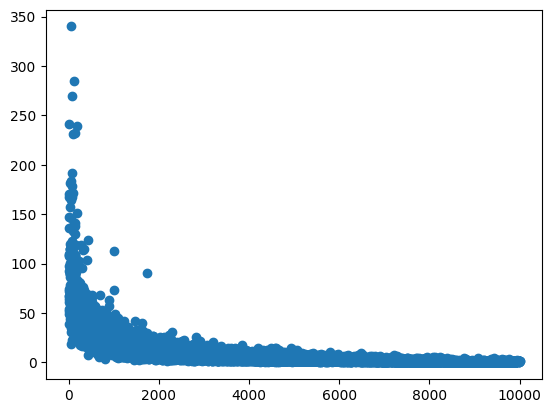

In [131]:
cut = 10000
plt.scatter(predictions[:cut].index.values, predictions[:cut].degree_gda.values)

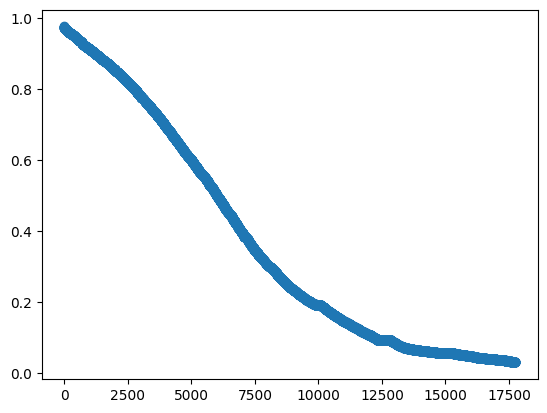

In [132]:
plt.scatter(predictions.index,predictions.score)

In [133]:
disease_evals = {}
for disease in tqdm(df[df.node_type == "disease"].index.values):
    predictions = prioritize(disease, old_encodings,df)
    disease_evals[disease] = hits_at_k(disease,predictions,old_full_df)

100%|██████████| 16079/16079 [04:53<00:00, 54.77it/s]


In [134]:
gene_evals = {}
for gene in tqdm(df[df.node_type == "gene_protein"].index.values):
    predictions = prioritize(gene, old_encodings,df)
    gene_evals[gene] = hits_at_k(gene,predictions,old_full_df)

100%|██████████| 17743/17743 [05:38<00:00, 52.34it/s]


In [135]:
total_disease_evals = pd.DataFrame(disease_evals).T
cols = total_disease_evals.columns
total_disease_evals = total_disease_evals.merge(df["node_name"],left_index=True,right_index=True)[["node_name",*cols]]

total_gene_evals = pd.DataFrame(gene_evals).T
cols = total_gene_evals.columns
total_gene_evals = total_gene_evals.merge(df["node_name"],left_index=True,right_index=True)[["node_name",*cols]]

In [136]:
k_list = [5,10,50,100]
summary_disease_evals = pd.DataFrame()
for k in k_list:
    summary_disease_evals[f"hits_{k}"] = total_disease_evals[f"{k}_new"] + total_disease_evals[f"{k}_seen"]

cols = summary_disease_evals.columns
add_cols=["node_name","degree_gda","degree_dd","comunidades_infomap","comunidades_louvain"]
summary_disease_evals = pd.merge(summary_disease_evals,df[add_cols],left_index=True,right_index=True)[[*add_cols,*cols]]

summary_gene_evals = pd.DataFrame()
for k in k_list:
    summary_gene_evals[f"hits_{k}"] = total_gene_evals[f"{k}_new"] + total_gene_evals[f"{k}_seen"]

cols = summary_gene_evals.columns
add_cols = ["node_name","degree_gda","degree_pp"]
summary_gene_evals = pd.merge(summary_gene_evals,df[add_cols],left_index=True,right_index=True)[[*add_cols,*cols]]

total_disease_evals = total_disease_evals.merge(summary_disease_evals["degree_gda"],left_index=True,right_index=True)
total_gene_evals = total_gene_evals.merge(summary_gene_evals["degree_gda"],left_index=True,right_index=True)

In [137]:
total_disease_evals.sort_values(by="10_seen",ascending=False)[:20]

node_name  seen_edges  new_edges  5_seen  \
20574                      Prostatic Neoplasms         504         49       3   
26109                 Mammary Neoplasms, Human         424         49       3   
18836                  Squamous cell carcinoma         102         13       3   
27074        Hereditary Diffuse Gastric Cancer         231         33       3   
33858                 Mammary Carcinoma, Human         411         56       4   
19096                      Depressive disorder         223         32       2   
20216                      Neoplasm Metastasis         173         19       3   
19908              Leukemia, Myelocytic, Acute         131         24       3   
25027                         Breast Carcinoma         431         54       3   
20754                            Schizophrenia         708         94       1   
22363                     Disease Exacerbation         134         11       1   
20882                        Stomach Neoplasms         238         27       3   
25931                         Cardiomyopathies          97         17       1   
18832            Non-Small Cell Lung Carcinoma         123         21       2   
20028            Malignant neoplasm of stomach         250         25       3   
19974                           Lung Neoplasms         211         25       3   
26819                        Mammary Neoplasms         410         60       3   
26159  Collecting Duct Carcinoma of the Kidney         106         12       2   
33257                         Absence Seizures          88          6       1   
18802                      Malignant Neoplasms         103         10       2   

       5_new  10_seen  10_new  50_seen  50_new  100_seen  100_new  degree_gda  
20574      0        6       0       24       1        38        1       616.0  
26109      0        5       0       20       0        33        3       525.0  
18836      0        5       0       13       0        17        0       124.0  
27074      0        5       0       14       1        29        2       293.0  
33858      0        5       0       19       1        36        2       525.0  
19096      0        4       0       13       3        36        4       289.0  
20216      0        4       0       11       0        24        1       217.0  
19908      0        4       0        7       1        11        1       173.0  
25027      0        4       0       17       2        36        4       538.0  
20754      0        4       0       11       4        34        8       883.0  
22363      0        4       0        8       0        15        1       165.0  
20882      1        4       1       14       2        30        4       297.0  
25931      0        4       0       10       2        13        2       130.0  
18832      1        4       1       14       2        22        3       156.0  
20028      1        4       1       12       1        31        1       300.0  
19974      0        4       0       16       1        22        4       265.0  
26819      0        4       0       19       1        32        5       527.0  
26159      0        4       0        6       2        12        2       128.0  
33257      0        3       0       10       1        17        2       102.0  
18802      0        3       0       11       1        20        3       128.0

In [19]:
def save_hits_df(model_name,desc,disease_total,disease_summary,gene_total,gene_summary,reports_folder=reports_folder):
    disease_total.to_csv(reports_folder+model_name+"_total_disease.csv")
    disease_summary.to_csv(reports_folder+model_name+"_summary_disease.csv")
    gene_summary.to_csv(reports_folder+model_name+"_summary_gene.csv")
    gene_total.to_csv(reports_folder+model_name+"_total_gene.csv")

    with open(reports_folder+model_name+"_desc.txt", "w") as f:
        f.write(desc)

def load_hits_df(model_name,reports_folder=reports_folder):
    fnames = ["_total_disease.csv","_summary_disease.csv","_summary_gene.csv","_total_gene.csv"]
    dfs = []
    for fname in fnames:
        dfs.append(pd.read_csv(reports_folder+model_name+fname,index_col=0))
    return dfs

In [20]:
model_name = "sage_ones_first_negatives_exp_04_07_23__12_07"
desc = "El sage ones que probamos con 0.9 AUC"

# save_hits_df(model_name,desc,total_disease_evals,summary_disease_evals,total_gene_evals,summary_gene_evals)

Hacer un bineo de nivel de evidencia y mostrar el promedio de los hits a diferentes k (conservar la separación entre seen y new). TAmbién grado disease-disease.
tomar seen-new-total 5-10-50.
Boxplot.

In [21]:
import numpy as np

def group_by_log(data_df,group_column,num_groups,max_log):
    df = data_df.copy()
    spacing = np.logspace(1,max_log,num=num_groups).round().astype(int)
    bins = np.digitize(df[group_column].values, spacing)
    df["bins"] = bins

    bin_ranges = []
    for bin in range(num_groups):
        bin_min = df[df.bins == bin].degree_gda.min()
        bin_max = df[df.bins == bin].degree_gda.max()
        bin_ranges.append((int(bin_min),int(bin_max)))

    return df, bin_ranges

def group_by_range(data_df,group_column,ranges,inplace=True):
    if not inplace:
        df = data_df.copy()
        bins = np.digitize(df[group_column].values, ranges)
        df["bins"] = bins
        return df
    else:
        df = data_df
        bins = np.digitize(df[group_column].values, ranges)
        df["bins"] = bins

In [22]:
df_list = load_hits_df(model_name)

In [142]:
df_list[0]

node_name  seen_edges  new_edges  \
19599                                   Hepatomegaly          46          6   
20754                                  Schizophrenia         708         94   
24165                 Malignant neoplasm of prostate         496         52   
18773                   Malignant neoplasm of breast         836        116   
18732                               Bladder Neoplasm         109         15   
...                                              ...         ...        ...   
30820  AMYLOID CARDIOMYOPATHY, TRANSTHYRETIN-RELATED           0          0   
30959              BERNARD-SOULIER SYNDROME, TYPE A1           0          0   
33955               Triple-Negative Breast Carcinoma           0          0   
32968                               DOCK8 Deficiency           0          0   
32509            Undifferentiated round cell sarcoma           0          0   

       5_seen  5_new  10_seen  10_new  50_seen  50_new  100_seen  100_new  \
19599       0      0        0       0        0       0         7        0   
20754       1      0        4       0       11       4        34        8   
24165       2      1        3       1       21       1        35        3   
18773       1      2        3       2       15       3        30        6   
18732       1      0        1       1        6       2        16        3   
...       ...    ...      ...     ...      ...     ...       ...      ...   
30820       0      0        0       0        0       0         0        0   
30959       0      0        0       0        0       0         0        0   
33955       0      0        0       0        0       0         0        0   
32968       0      0        0       0        0       0         0        0   
32509       0      0        0       0        0       0         0        0   

       degree_gda  
19599        54.0  
20754       883.0  
24165       616.0  
18773      1074.0  
18732       140.0  
...           ...  
30820         0.0  
30959         0.0  
33955         0.0  
32968         0.0  
32509         0.0  

[16079 rows x 12 columns]

In [23]:
disease_ranges = np.array([5,20,df_list[0].degree_gda.max()+1]).astype(int)
gene_ranges = np.array([5,20,df_list[3].degree_gda.max()+1]).astype(int)
range_text = ["bajo","medio","alto"]

for i,data in enumerate(df_list):
    if i<2:
        data = group_by_range(data[data.degree_gda != 0],"degree_gda",disease_ranges,inplace=False)
        df_list[i] = data
    else:
        data = group_by_range(data[data.degree_gda != 0],"degree_gda",gene_ranges,inplace=False)
        df_list[i] = data        

def plot_box(data_df,value_cols,title,range_text=range_text):
    melted_df = data_df[["bins",*value_cols]].melt("bins").rename(columns={"value":"hits"})
    melted_df["Nivel de Evidencia"] = melted_df.bins.apply(lambda x: range_text[x])
    fig = px.box(melted_df.sort_values(by="bins"),y="hits",x="Nivel de Evidencia",color="variable",title=title,width=900,height=450)
    fig.show()

Podríamos tomar "medio" 5-20 enlaces y dejar bajo de lado (menos de 5)

Controlar cuenta de seen edges xq hay enf con degree 1 y seen edges 2: x ej node index: 20218

PAra Unseen sacar todos los seen de la lista y resetear el ranking. Usar las dos métricas.

In [24]:
#test correct number of edges
aver = df_list[0]
aver[(aver.new_edges + aver.seen_edges) > aver.degree_gda]

Empty DataFrame
Columns: [node_name, seen_edges, new_edges, 5_seen, 5_new, 10_seen, 10_new, 50_seen, 50_new, 100_seen, 100_new, degree_gda, bins]
Index: []

In [105]:
df_list[0]

node_name  seen_edges  new_edges  5_seen  \
19599                             Hepatomegaly          38          6       0   
20754                            Schizophrenia         718         83       0   
24165           Malignant neoplasm of prostate         501         59       3   
18773             Malignant neoplasm of breast         861        109       0   
18732                         Bladder Neoplasm         112         15       3   
...                                        ...         ...        ...     ...   
31677  Ohdo syndrome, Maat-Kievit-Brunner type           1          0       0   
25756      Blepharophimosis syndrome Ohdo type           1          0       0   
32660               TAKENOUCHI-KOSAKI SYNDROME           1          0       0   
20218                         Neoplasm Seeding           1          0       0   
30288                Myopia, susceptibility to           1          0       0   

       5_new  10_seen  10_new  50_seen  50_new  100_seen  100_new  degree_gda  \
19599      0        0       0        0       0         0        0        54.0   
20754      0        1       0        1       0         4        0       883.0   
24165      0        3       0       10       2        24        3       616.0   
18773      0        0       0        4       0         6        0      1074.0   
18732      0        3       0        8       1        14        1       140.0   
...      ...      ...     ...      ...     ...       ...      ...         ...   
31677      0        0       0        0       0         0        0         1.0   
25756      0        0       0        0       0         0        0         1.0   
32660      0        0       0        0       0         0        0         1.0   
20218      0        0       0        0       0         0        0         1.0   
30288      0        0       0        0       0         0        0         1.0   

       bins  
19599     2  
20754     2  
24165     2  
18773     2  
18732     2  
...     ...  
31677     0  
25756     0  
32660     0  
20218     0  
30288     0  

[11166 rows x 13 columns]

In [25]:
value_pairs = [["5_seen","5_new"],["10_seen","10_new"],["50_seen","50_new"]]
for pair in value_pairs:
    plot_box(df_list[0],pair,"Evaluación Enfermedades")

In [173]:
value_pairs = [["5_seen","5_new"],["10_seen","10_new"],["50_seen","50_new"]]
for pair in value_pairs:
    plot_box(df_list[3],pair,"Evaluación Genes")

In [65]:
summary_disease_evals.sort_values(by="hits_10",ascending=False)[50:70]

node_name  degree_gda  degree_dd  \
18975              Colonic Neoplasms       152.0        5.0   
22276                  Pain, Burning        49.0        0.0   
20391                           Pain        49.0        0.0   
19732                    Hypotension        53.0        2.0   
25377                Pain, Migratory        49.0        0.0   
20890        Streptozotocin Diabetes       108.0        0.0   
26108      Mammary Carcinoma, Animal       142.0        0.0   
20209                       Necrosis        55.0        0.0   
20028  Malignant neoplasm of stomach       300.0        5.0   
20030       Animal Mammary Neoplasms       142.0        0.0   
22389          Amphetamine Addiction        75.0        0.0   
22293              Continuous Tremor         9.0        0.0   
25451            Pill Rolling Tremor         9.0        0.0   
18816       Malignant tumor of colon       159.0        7.0   
20243        nervous system disorder        53.0       27.0   
18832  Non-Small Cell Lung Carcinoma       156.0        5.0   
21370                Benign Neoplasm        68.0       12.0   
30411       Nasopharyngeal carcinoma        22.0        6.0   
25138   Malignant neoplasm of kidney        45.0        6.0   
22301                 Resting Tremor         9.0        0.0   

       comunidades_infomap  comunidades_louvain  hits_5  hits_10  hits_50  \
18975                624.0                  3.0       1        5       16   
22276                  NaN                  NaN       2        5       16   
20391                  NaN                  NaN       2        5       16   
19732                 74.0                 23.0       2        5       13   
25377                  NaN                  NaN       2        5       15   
20890                  NaN                  NaN       4        5       18   
26108                  NaN                  NaN       3        5        9   
20209                  NaN                  NaN       4        5       10   
20028                 24.0                  3.0       3        5       15   
20030                  NaN                  NaN       2        5       10   
22389                  NaN                  NaN       3        5        8   
22293                  NaN                  NaN       4        4        7   
25451                  NaN                  NaN       4        4        7   
18816                624.0                  3.0       1        4       15   
20243                150.0                 36.0       3        4        8   
18832                143.0                  5.0       2        4       16   
21370                 92.0                  3.0       2        4        5   
30411                 97.0                  3.0       3        4        6   
25138                 36.0                  3.0       2        4        5   
22301                  NaN                  NaN       4        4        8   

       hits_100  
18975        24  
22276        22  
20391        25  
19732        22  
25377        22  
20890        24  
26108        17  
20209        12  
20028        27  
20030        16  
22389        14  
22293         8  
25451         8  
18816        21  
20243        13  
18832        25  
21370        15  
30411         8  
25138         7  
22301         9

In [24]:
summary_gene_evals.sort_values(by="hits_5",ascending=False)[:20]

node_name  degree_gda  degree_pp  hits_5  hits_10  hits_50  hits_100
6931      GSTA4        10.0        4.0       5        8        8         8
1846        CLU        66.0       54.0       5       10       17        19
9227       MST1        20.0        2.0       5        6        7        11
9192     MIR338        13.0        0.0       5        9       13        13
8730    MIR130A        14.0        0.0       5        8       11        11
16173     CASP8        58.0       71.0       5        8       12        23
9667      OPRM1       109.0       70.0       5        6       23        32
8816     MIR30A        26.0        0.0       5        8       16        20
153     MIR1247         9.0        0.0       5        6        7         9
3206     CCDC80         8.0        0.0       5        6        6         6
8748     MIR150         9.0        0.0       5        6        9         9
14360       TRH       100.0        2.0       5        8       28        31
8756     MIR18A        11.0        0.0       5        8       11        11
17862     FADS2        14.0        2.0       5        6        8        10
6156     HAVCR1        16.0        0.0       5        6        6         9
10316      PDK4        13.0        6.0       5        7        7         7
17802   SLC22A8        12.0        1.0       5        6        9        10
6477       GPD1         8.0        3.0       5        6        6         6
13069   S100A11         8.0        4.0       5        6        6         6
8796      MIR22        10.0        0.0       5        6        7         8

# AUCs para predicciones individuales 

In [25]:


# node_index = 25249	
# preds = prioritize(node_index,encodings,df)
# testing_edges = new_full_df[(new_full_df.dataset == "validation") & (new_full_df.disease == node_index) & (new_full_df.edge_subtype == "supervision")][["gene_protein","label"]]
# scores = preds.merge(testing_edges, left_on="node_index",right_on="gene_protein",how="right")[["score","label"]]
# auc = round(roc_auc_score(scores.label.values,scores.score.values),3)

# disease_evals = {}
# for node_index in tqdm(df[df.node_type == "disease"].index.values):
#     preds = prioritize(node_index,encodings,df)
#     testing_edges = new_full_df[(new_full_df.dataset == "validation") & (new_full_df.disease == node_index) & (new_full_df.edge_subtype == "supervision")][["gene_protein","label"]]
#     if len(testing_edges) != 0:
#         if len(testing_edges.label.unique()) > 1:
#             scores = preds.merge(testing_edges, left_on="node_index",right_on="gene_protein",how="right")[["score","label"]]
#             auc = round(roc_auc_score(scores.label.values,scores.score.values),3)
#             pos,neg = scores.label.value_counts()
#             balance = pos/neg
#             disease_evals[node_index] = {"auc":auc, "num_samples":len(scores), "balance":balance}


  0%|          | 0/16079 [00:00<?, ?it/s]

100%|██████████| 16079/16079 [08:42<00:00, 30.79it/s]


In [35]:
# gene_evals = {}
# for node_index in tqdm(df[df.node_type == "gene_protein"].index.values):
#     preds = prioritize(node_index,encodings,df)
#     testing_edges = new_full_df[(new_full_df.dataset == "validation") & (new_full_df.gene_protein == node_index) & (new_full_df.edge_subtype == "supervision")][["disease","label"]]
    
#     if len(testing_edges) != 0:
#         if len(testing_edges.label.unique()) > 1:
#             scores = preds.merge(testing_edges, left_on="node_index",right_on="disease",how="right")[["score","label"]]
#             auc = round(roc_auc_score(scores.label.values,scores.score.values),3)
#             pos,neg = scores.label.value_counts()
#             balance = pos/neg
#             gene_evals[node_index] = {"auc":auc, "num_samples":len(scores), "balance":balance}

100%|██████████| 17743/17743 [07:32<00:00, 39.17it/s]


In [51]:
# disease_auc = pd.DataFrame(disease_evals).T
# disease_auc.balance = disease_auc.balance.apply(lambda x: abs(x-1))

# gene_auc = pd.DataFrame(gene_evals).T
# gene_auc.balance = gene_auc.balance.apply(lambda x: abs(x-1))

In [48]:
# disease_auc.balance = disease_auc.balance.apply(lambda x: abs(x-1))
# disease_auc.sort_values(by="balance")[:20]

auc  num_samples  balance
34080  1.000          2.0      0.0
18704  1.000          4.0      0.0
27573  1.000          2.0      0.0
33376  0.980         14.0      0.0
27762  1.000          2.0      0.0
29614  1.000          2.0      0.0
32316  1.000          2.0      0.0
31282  1.000         18.0      0.0
21791  0.000          2.0      0.0
21355  0.000          2.0      0.0
27660  0.000          2.0      0.0
23704  1.000          2.0      0.0
26974  1.000          2.0      0.0
24470  0.976         26.0      0.0
18559  0.250          4.0      0.0
23123  0.000          4.0      0.0
21426  1.000          2.0      0.0
28674  0.000          2.0      0.0
19132  1.000          2.0      0.0
25183  0.750          4.0      0.0

In [53]:
# gene_auc.sort_values(by="balance")[:20]

auc  num_samples  balance
0      1.000          2.0      0.0
15703  1.000          2.0      0.0
14078  1.000          2.0      0.0
6853   0.778          6.0      0.0
11853  0.000          2.0      0.0
1836   1.000          2.0      0.0
1788   0.000          2.0      0.0
10537  0.000          4.0      0.0
4164   1.000          4.0      0.0
17221  0.000          2.0      0.0
1740   1.000          2.0      0.0
14675  0.500          4.0      0.0
17741  1.000          2.0      0.0
4806   1.000          2.0      0.0
1677   1.000          2.0      0.0
1881   0.444          6.0      0.0
13981  0.500          4.0      0.0
8029   1.000          6.0      0.0
14203  1.000          2.0      0.0
9750   1.000          6.0      0.0

# Average precision ?

In [86]:
df_list[1].sort_values(by="hits_100",ascending=False)[20:30]

node_name  degree_gda  degree_dd  \
33376  Generalized Absence Seizures       101.0        0.0   
22319               Clonic Seizures       101.0        0.0   
19798            Jacksonian Seizure       101.0        0.0   
23152                Visual seizure       101.0        2.0   
33266            Myoclonic Seizures       104.0        0.0   
33257              Absence Seizures       102.0        0.0   
25027              Breast Carcinoma       538.0       19.0   
26109      Mammary Neoplasms, Human       525.0        0.0   
33858      Mammary Carcinoma, Human       525.0        0.0   
26819             Mammary Neoplasms       527.0        5.0   

       comunidades_infomap  comunidades_louvain  hits_5  hits_10  hits_50  \
33376                  NaN                  NaN       5        8       23   
22319                  NaN                  NaN       4        8       26   
19798                  NaN                  NaN       4        7       23   
23152                484.0                 43.0       4        8       23   
33266                  NaN                  NaN       4        8       26   
33257                  NaN                  NaN       3        7       24   
25027                 15.0                  2.0       4        6       27   
26109                  NaN                  NaN       2        2       24   
33858                  NaN                  NaN       3        3       22   
26819                 11.0                  3.0       4        4       21   

       hits_100  bins  
33376        48     2  
22319        48     2  
19798        48     2  
23152        48     2  
33266        47     2  
33257        47     2  
25027        46     2  
26109        42     2  
33858        40     2  
26819        38     2

In [89]:
from sklearn.metrics import average_precision_score
node_index = 26819
predictions = prioritize(node_index,new_encodings,df)

labels = new_full_df[new_full_df.disease == node_index][["gene_protein","label"]].fillna(1).drop_duplicates()
merged = predictions.merge(labels, left_on="node_index",right_on="gene_protein",how="left").fillna(0).drop(columns="gene_protein")
scores = merged.score.values[:50]
labels = merged.label.values[:50]

average_precision_score(labels,scores)

0.4949926643771628

In [88]:
merged[:20]

score  tensor_index  node_index node_name  degree_gda  label
0   0.883          4174        4165      ENO1        57.0    1.0
1   0.880         10392       10623     ATP7B        43.0    1.0
2   0.880         17413       16948   TNFSF10        49.0    1.0
3   0.880         10311        4631      FHIT        32.0    0.0
4   0.880           638        8214      KRT8        35.0    1.0
5   0.878           526        3459     DAPK1        43.0    0.0
6   0.877         11356       13276   SELENOP        35.0    0.0
7   0.877            59        7419     BIRC5        42.0    0.0
8   0.877          4052       11652     PRKCE        35.0    0.0
9   0.877         17560       17015    INPP4B        17.0    0.0
10  0.876         13161        7164     ANXA4        26.0    0.0
11  0.875         15622        9733      NOX4        19.0    0.0
12  0.874           561        9011       MIF        48.0    1.0
13  0.874          2150        9017     MKI67        29.0    1.0
14  0.874          3356        3559   GADD45A        23.0    0.0
15  0.874         15100        8744    MIR145        32.0    1.0
16  0.873          6471       18405     NR1H4        39.0    0.0
17  0.873          9839       14130    TCF7L2        29.0    0.0
18  0.873         12168        6938     GSTT1        52.0    0.0
19  0.873         13326        6222      GJB1        28.0    0.0